# Lab Work 2: Text Processing: Preparation of texts

## 1. Load the data and CountVectorize it

Download and import the list of text files in [sherlock.zip](https://www.ili.fh-aachen.de/goto_elearning_file_815003_download.html). <br>
These represent Sherlock Holmes stories by [Arthur Conan Doyle](https://en.wikipedia.org/wiki/Arthur_Conan_Doyle).

In [1]:
filename = [r"./Sherlock/Sherlock.txt", 
             r"./Sherlock/Sherlock_blanched.txt",
             r"./Sherlock/Sherlock_black.txt",
             r"./Sherlock/Sherlock_blue.txt",
             r"./Sherlock/Sherlock_card.txt"]

Now we create a [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). <br> The parameter given tells the CountVectorizer that its methods shall operate on a list of filenames.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(input="filename")

### Using the CountVectorizer, a Bag of Words is generated, together with all features names:

In [3]:
BoWords = vectorizer.fit_transform(filename)
features = vectorizer.get_feature_names_out()

### We now check the following three categories of the text files:
##### Total number of different words

The number of different words per document are saved in the `different_words_per_document` list. <br> A boolean array is then used to identify the words with a count greater than 0, effectively counting the different words for every document. <br> <br> 
Using the [`get_feature_names_out()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names_out) method, a list of all different words is returned, the length of which is the **total number of different words**.

In [4]:
different_words_per_document = [(BoWords[i] > 0).sum() for i in range(BoWords.shape[0])]

for i, num_words in enumerate(different_words_per_document):
    print(f"{i + 1}. {num_words} different words")

total_different_words = len(features)
#print(features)
print(f"\nTotal number of different words: {total_different_words}")


1. 7952 different words
2. 1727 different words
3. 1791 different words
4. 1753 different words
5. 1781 different words

Total number of different words: 8879


##### Total number of words per document

In [5]:
words_per_document = BoWords.sum(axis=1)
for i, count in enumerate(words_per_document):
    print(f"{i + 1}. {count.item()} words")

1. 107416 words
2. 7258 words
3. 7775 words
4. 7497 words
5. 8242 words


##### Total number of occurrences of each word

In [6]:
total_occurrences_per_word = BoWords.sum(axis=0)

# A dictionary with the results in the form word(key): number of occurrences(value)
dict = {word: total_occurrences_per_word[0, i].item() for i, word in enumerate(features)}

for word, occurrences in dict.items():
    print(f"{word}: {occurrences} occurrences")


117: 2 occurrences
12: 1 occurrences
12s: 1 occurrences
13: 1 occurrences
131: 2 occurrences
13th: 1 occurrences
14th: 1 occurrences
15: 1 occurrences
16: 2 occurrences
1840: 1 occurrences
1872: 1 occurrences
1881: 1 occurrences
1883: 10 occurrences
1884: 3 occurrences
1887: 1 occurrences
1888: 1 occurrences
1892: 1 occurrences
1893: 1 occurrences
1894: 4 occurrences
1895: 1 occurrences
18th: 1 occurrences
1900: 1 occurrences
1901: 2 occurrences
1903: 1 occurrences
1904: 1 occurrences
1926: 1 occurrences
1st: 2 occurrences
20th: 1 occurrences
22: 1 occurrences
221b: 1 occurrences
22d: 1 occurrences
22nd: 2 occurrences
23rd: 1 occurrences
249: 1 occurrences
26: 1 occurrences
30: 5 occurrences
3rd: 1 occurrences
426: 1 occurrences
427: 3 occurrences
45: 2 occurrences
46: 2 occurrences
50: 1 occurrences
6d: 1 occurrences
6th: 1 occurrences
7s: 1 occurrences
83: 2 occurrences
87: 1 occurrences
95: 7 occurrences
97: 1 occurrences
aback: 3 occurrences
abandon: 7 occurrences
abandoned: 1 occu

Based on both the `total number of words` and the `number of different words` for each document , it can be assumed that the first document has a different type of content than the rest. <br> <br>
**Upon further inspection, *the first document is a collection of stories*, whereas *the other 4 documents are single short stories*.**

## 2. Determining which word is occuring the most

This is done in three steps, since the `vectorizer.vocabulary_` is organized as a dictonary with *the value indicating the position of the word in the array*. <br>

1. Find out the highest count of a word
2. Find out the position of this count
3. Find out the word at this position

Firstly, we need to find out what the highest number of occurrences for a word is.

In [7]:
total_occurrences_per_word.max()

7975

After defining the maximum occurrence count for a single word, we need to determine the position of the word in the `total_occurrences_per_word` list.

In [8]:
total_occurrences_per_word.argmax()

7921

Using $\max f(x)$ returns the maximum value of $\operatorname{f}(x)$, whereas $\argmax(x)$ returns the first value of $\operatorname{x}$ at which this maximum is attained. <br> While it is a more concise way to find the position of the maximum value, this implementation neglects multiple occurrences where this value is reached.

By utilizing the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) from the `numpy` library returns an array with two possible indices which satisfy the condition of equality.

In [9]:
import numpy as np

positions_list = np.where(total_occurrences_per_word == total_occurrences_per_word.max())
positions_list

(array([0]), array([7921]))


Interpreting the result, the maximum value in the array `tot_perWord` is at position *(0, 7921)* in the 2D array.

In [10]:
for pos in positions_list[1]:
    print(f"{features[pos]}: {total_occurrences_per_word[0, pos].item()} occurrences")

the: 7975 occurrences


#### Alternatively, creating a dataframe with `pandas` is a more efficient way to find not only the word with the highest number of occurrences, but also satisfy other filtering criteria.

E.g. Top `N` most/least frequent words, words that begin with a specific letter, numbers, etc.

In [11]:
import pandas as pd

bow_df = pd.DataFrame(BoWords.toarray(), columns=features)
bow_df

,117,12,12s,13,131,13th,14th,15,16,1840,...,yourselves,youth,youthful,youths,yoxley,zealous,zenith,zest,zigzag,zoo
0,0,1,0,1,2,1,1,1,2,1,...,1,5,1,0,7,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Using the `sum()` and `sort_values()` methods the top 10 most frequently occuring words can be directly ascertained.

In [23]:
top_words_count = bow_df.sum(axis=0).sort_values(ascending=False).iloc[0:10]
top_words_count

the     7975
and     3819
of      3640
to      3431
that    2754
it      2419
was     2406
in      2366
he      2247
you     2137
dtype: int64

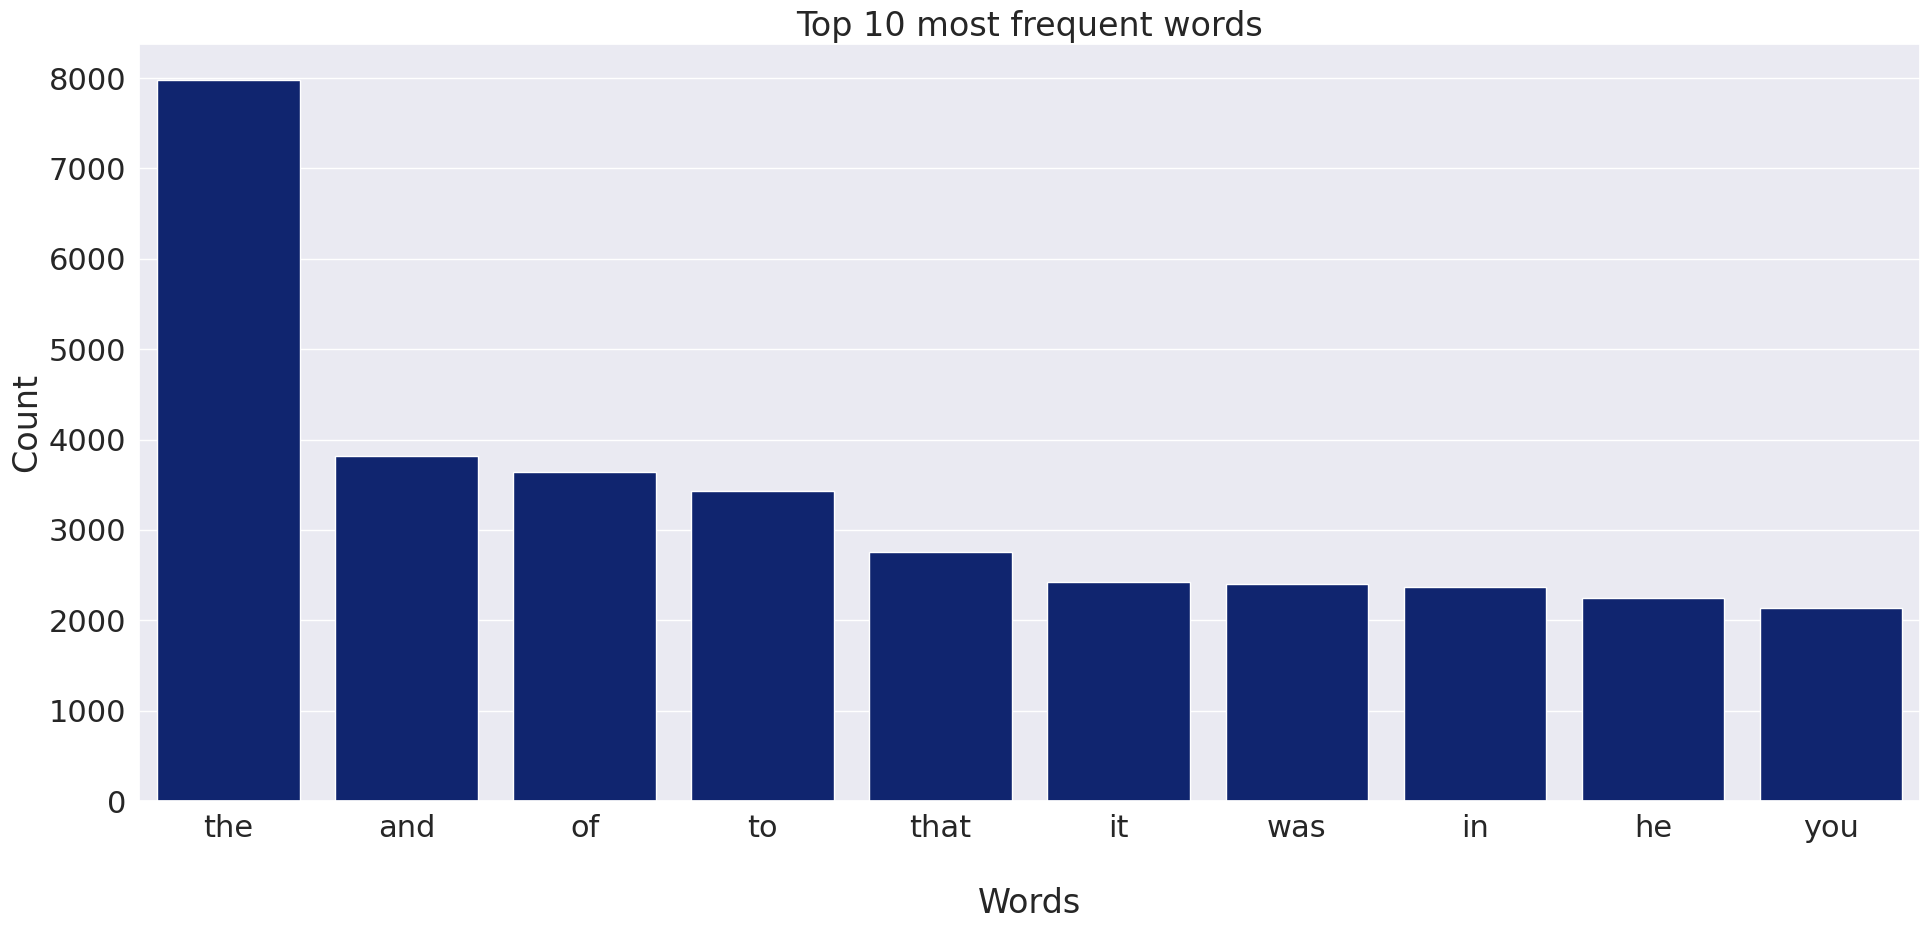

In [68]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['figure.autolayout'] = True

ax = sns.barplot(x=top_words_count.index, y=top_words_count.values)
ax.set(xlabel='\nWords', ylabel='Count', title = "Top 10 most frequent words")
plt.show()

# 6.3 Improving using stop word, ngrams and tf-idf
The feature space is vast with nearly 9000 dimensions. Hence we should try to reduce the number of dimensions by:

1. use only words that have a mimimum occurence in all documents (minimal document frequency) min_df
2. remove stop words (like 'a', 'and', 'the') as they don't give valuable information for classification and/or 
3. remove words that occur in many documents (maximum document frequency) max_df 

Experiment with the values of min_df and max_df and see how the size of the vocabulary is changing.

Implement all three options and check for their separate outcome an their combinations

In [14]:
# your code here

# 6.4 Rescaling the data using term frequency inverse document frequency
Here, term frequency is the number of occurences of a term (word) $t$ in a document $d$. 

$\operatorname{tf}(t, d) = f_{t, d}$ 

Sometimes tf gets normalized to the length of $d$
The inverse document frequency idf is a measure on the amount of information a term t carries. Rare occurences of t leads to a high amount of information common occurence to a low amount of information. The idf is computed as 

$\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$

where $n$ is the total number of documents and $\text{df}(t)$ is the number of documents that contain the term $t$. Hence, the tf-idf is the product of the two terms:

$\text{tf-idf(t,d)}=\text{tf(t,d)} \cdot \text{idf(t)}$

scikit-learn supports this in the `TfidfTransformer`, when using the following parameters: `TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)`. Refer to the scikit documentation for the parameter sets and how this changes the formula.

Combining Bag of Words and tf-idf can be done using the `TfidfVectorizer`

# 6.4.1 Find maximum value for each of the features over dataset

In [15]:
# your code here